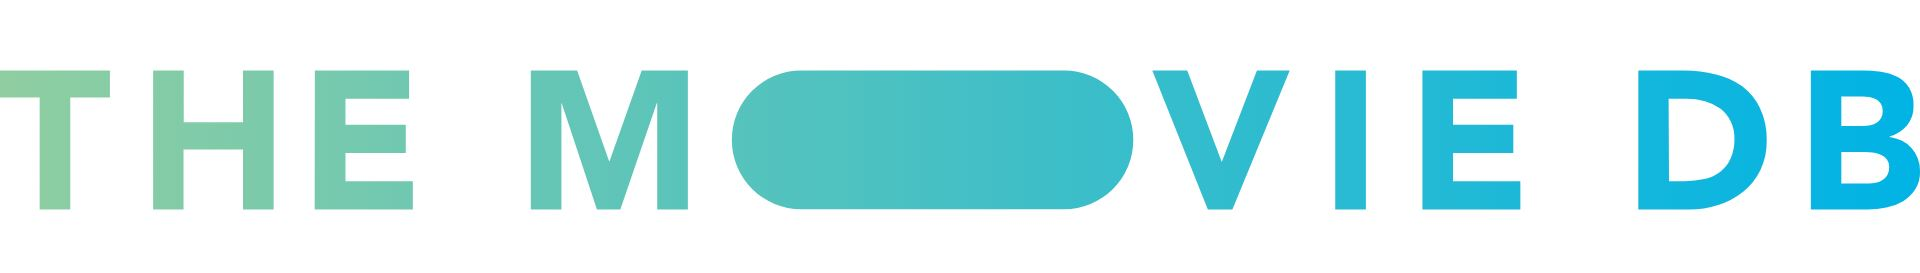

# <span style="color:cadetblue">Project: Investigate a Dataset - [TMDb Movie Data]</span>

## <span style="color:darkgoldenrod">Table of Contents</span>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## <span style="color:darkgoldenrod">1- Introduction </span>

### <span style="color:teal">1.1 Dataset Description </span>
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>**Notes**:
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. no need for cleaning them.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

>**Columns Names**:
    - ID
    - IMDB ID
    - Popularity
    - Budget
    - Revenue
    - Original Title
    - Cast
    - Homepage
    - Director
    - Tagline
    - Keywords
    - Overview
    - Runtime
    - Genres
    - Production Companies
    - Release Date
    - Vote Count
    - Vote Average
    - Release Year
    - Budget Adj
    - Revenue Adj


### <span style="color:teal">1.2 Question(s) for Analysis</span>
- In which year each genre was the most/least popular?
- Which genres are most/least popular from year to year? 
- Did the number of movies increase through years? and what is the average growth rate? 
- What are the top 10 movies with respect to [ Popularity, Budget, Revenue, Runtime, Vote Average]
- How do popularity, budget and vote average associated with revenue?
- What is the relation between vote average and popularity?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

<a id='wrangling'></a>
## <span style="color:darkgoldenrod">2- Data Wrangling </span>

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.<br />

    - So, first let's take a look on the dataset.

In [2]:
TMDB_df = pd.read_csv(os.path.join('Database_TMDb_movie_data', 'tmdb-movies.csv'))  # Load data
TMDB_df.head()                                                                      # Print out few lines

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


    - Check the number of records and columns

In [3]:
rows, columns = TMDB_df.shape  # show number of rows and column
print('\tThe dataset has "{}" records in "{}" columns.'.format(rows, columns))

	The dataset has "10866" records in "21" columns.


    - Show dataset stats for numerical columns

In [4]:
TMDB_df.describe() # show sata stats

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<pre>
                Min.	      Max.
Popularity:	0.000065  |  32.985763
Budget:      	0	   | 425,000,000
Revenue:    	 0	   |2,827,124,000
Runtime:    	 0	   |    900
Vote Count: 	10	   |   9,767
Vote Average:   1.5	  |    9.5
Release Year:   1960     |    2015
</pre>
    - Columns as runtime, budget and revnue have a zero-valued records,which makes no sense.
    - Budget & revenue columns (the inflation adjusted) having 50% or maybe more zero-valued records would affect the          accuracy of the analysis.
    - The data set has records from year 1960 to year 2015.
    - The highest budget is 15% of the highest revenue.

    - Check the number of null values and the data type of each column

In [5]:
TMDB_df.info() # show data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

    - Release date data type is object
    - Columns <imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies> all have         missing records.


### <span style="color:teal">2.1 Data Cleaning </span>
based on the previous observations, dataset cleaning will go as follows:
    - Change 'release date' data type from object to date time.
    - Drop unused columns ('imdb_id', 'budget', 'revenue' 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies').
    - Drop null data rows in case of object columns.
    - Drop duplicates.
    - Rename 'bugdet_adj' & 'revenue_adj' columns to 'budget' & 'revenue'
    - Handle zero-valued records in budget & revenue.
    - Handle zero-valued records in runtime
 

####   <span style="color:crimson"> - Change release_date data type to date time</span>

In [6]:
# set Release date data type to date time type
TMDB_df['release_date'] = pd.to_datetime(TMDB_df['release_date'])

#### <span style="color:crimson"> - Drop unused columns </span>
    < id, imdb_id, budget, revenue, cast, homepage, director, tagline, keywords, overview, production_companies >

In [7]:
# drop unused columns 
TMDB_df.drop({'id', 'imdb_id', 'budget', 'revenue', 'cast','homepage','director','tagline','keywords','overview','production_companies'}, axis=1, inplace=True)
TMDB_df.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


#### <span style="color:crimson"> - Drop null data rows </span>
    genres has only 23 null data rows, so we can drop them

In [8]:
TMDB_df.info() # show data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 849.0+ KB


In [9]:
TMDB_df.dropna(inplace = True)  # drop null data rows

#### <span style="color:crimson"> - Drop duplicates </span>

In [10]:
print('\tDataset has "{}" duplicated rows'.format(TMDB_df.duplicated().sum()))

	Dataset has "1" duplicated rows


In [11]:
TMDB_df.drop_duplicates(inplace=True)

In [12]:
TMDB_df.duplicated().sum()

0

#### <span style="color:crimson"> - Rename 'bugdet_adj' & 'revenue_adj' columns to 'budget' & 'revenue' </span>

In [13]:
TMDB_df.rename(columns={'budget_adj': 'budget', 'revenue_adj': 'revenue'}, inplace=True)

#### <span style="color:crimson"> - Handle zero values in budget and revenue columns </span>
    1- In case one of them is available either the revenue or the budget: 
        - calculate budget to revenue percentage 
        - get the median  
        - use it to get the missing one from the other
    2- In case both are missing: (assuming that the movies in the same year have the same average budget and revenue) 
        - get average revenue and budget for every year 
        - replace the zero values with the average budget and revenue for every year

    - Check the number of zero-valued records in budget and revenue columns

In [14]:
print('\tbudget has "{}" zero-value records'.format(TMDB_df['budget'].value_counts()[0]))
print('\trevenue has "{}" zero-value records'.format(TMDB_df['revenue'].value_counts()[0]))

	budget has "5674" zero-value records
	revenue has "5993" zero-value records


In [15]:
zero_value_budget = TMDB_df[TMDB_df.budget == 0]
zero_value_budget_revenue = zero_value_budget[zero_value_budget.revenue == 0]

print('\tThey both have zero-value record at the same time for "{}" times'.format(zero_value_budget_revenue.shape[0]))

	They both have zero-value record at the same time for "4679" times


    - Get the budget to revenue percentage for every row and then get the median

In [16]:
# Calculate budget to revenue percentage 
TMDB_df['budget_to_revenue_percentage'] = (TMDB_df['budget']/TMDB_df['revenue']) * 100          # budget to revenue percentage 
TMDB_df['budget_to_revenue_percentage'] = TMDB_df['budget_to_revenue_percentage'].replace(np.inf, 0) # handling zero divisor 

In [17]:
# get the median
budget_to_revenue_percentage_median = int(TMDB_df['budget_to_revenue_percentage'].median())
print('\tThe budget to revenue percentage median is "{}%"'.format(budget_to_revenue_percentage_median))

	The budget to revenue percentage median is "19%"


In [18]:
# drop budget_to_revenue_percentage row
TMDB_df.drop({'budget_to_revenue_percentage'}, axis=1, inplace=True)  

    - Create the budget and revenue average per year dict, to use it in case both budget and revenue are equal to zero as a replacement to zero values

In [19]:
"""
    create_per_year_dict (cpyd):
    Calculate the average of a columns records per year 
       average = ( the sum of all records for the year / (records count - zero values count) )
    Args:
        (str) cpyd_column - column name
        (dict) cpyd_per_year_dict - years:  average dict
"""
def create_per_year_dict (cpyd_column, cpyd_per_year_dict):
    
    col_sum_per_year = TMDB_df.groupby(['release_year'])[cpyd_column].sum()     # the sum of values per year
    col_records_per_year= TMDB_df.groupby(['release_year'])[cpyd_column].size() # No. of records
    
    # for loop to create the dict 
    for (year_index, sum_per_year , records_per_year ) in zip(col_sum_per_year.index, col_sum_per_year, col_records_per_year):
        zero_records_per_year = TMDB_df.groupby(['release_year'])[cpyd_column].value_counts()[year_index][0] # zero values count
        cpyd_per_year_dict[year_index] = int(sum_per_year / (records_per_year - zero_records_per_year)) # get the average

In [20]:
budget_average_per_year_dict = {}  # create a dict for budget average per year
revenue_average_per_year_dict = {} # create a dict for revenue average per year

# fill the dict
create_per_year_dict('budget', budget_average_per_year_dict)
create_per_year_dict('revenue', revenue_average_per_year_dict)


    - Replace the zero values

In [21]:
zero_budget_revenue_count, zero_budget_count, zero_revenue_count=0,0,0  # counters to ensure replacing is done correctly

# looping through budget and revenue records to search for zero values
for (index, release_year, budget, revenue) in zip(TMDB_df.index, TMDB_df['release_year'], TMDB_df['budget'], TMDB_df['revenue']):
  # in case budget only is equal to zero 
    if (budget == 0) & (revenue != 0):
      # we assume budget is equal to 19%  of the revnue
        TMDB_df.loc[index, ['budget']] = int(TMDB_df.loc[index, ['revenue']]  * (budget_to_revenue_percentage_median/100))
        zero_budget_count+=1 # increment the counter
        
  # in case revenue only is equal to zero
    elif (budget != 0) & (revenue == 0):
     # as we assume budget is equal to 19%  of the revenue, then revenue is 100/19 of the budget
        TMDB_df.loc[index, ['revenue']] = int(TMDB_df.loc[index, ['budget']] * (100/budget_to_revenue_percentage_median))
        zero_revenue_count+=1 # increment the counter
        
  # in case both are equal to zero    
    elif (budget == 0) & (revenue == 0):
     # we will replace the zero value with the average of the year
        TMDB_df.loc[index, ['budget']] = budget_average_per_year_dict[release_year] # get the average from bugdet average per year dict
        TMDB_df.loc[index, ['revenue']] = revenue_average_per_year_dict[release_year] # get the average from revenue average per year dict
        zero_budget_revenue_count+=1 # increment the counter

print('There was \n\t"{}" records where the budget and revenue were equal to zero at the same time, \n\t"{}" records where only'\
      ' the budget was equal to zero and,\n\t"{}" records where only the revenue was equal to zero'.format(zero_budget_revenue_count,
                                                                                                       zero_budget_count, zero_revenue_count))

There was 
	"4679" records where the budget and revenue were equal to zero at the same time, 
	"995" records where only the budget was equal to zero and,
	"1314" records where only the revenue was equal to zero


#### <span style="color:crimson"> - Handle zero-valued records in runtime  </span>
    Replace zero values with runtime mean

In [22]:
runtime_mean = TMDB_df['runtime'].mean()
runtime_mean

102.1384430916805

In [23]:
TMDB_df['runtime'].replace(0, runtime_mean, inplace = True)

    - Check the data after trimming & cleaning

In [24]:
TMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null float64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget            10842 non-null float64
revenue           10842 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 1.2+ MB


In [25]:
TMDB_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,102.421062,217.823649,5.974064,2001.314794,3.334608e+07,1.137617e+08
std,1.001032,30.828622,576.180993,0.934257,12.813617,3.086740e+07,1.437328e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.208210,90.000000,17.000000,5.400000,1995.000000,1.310186e+07,3.367628e+07
50%,0.384532,99.000000,38.000000,6.000000,2006.000000,3.144669e+07,9.720918e+07
75%,0.715393,111.000000,146.000000,6.600000,2011.000000,3.897917e+07,1.199789e+08
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


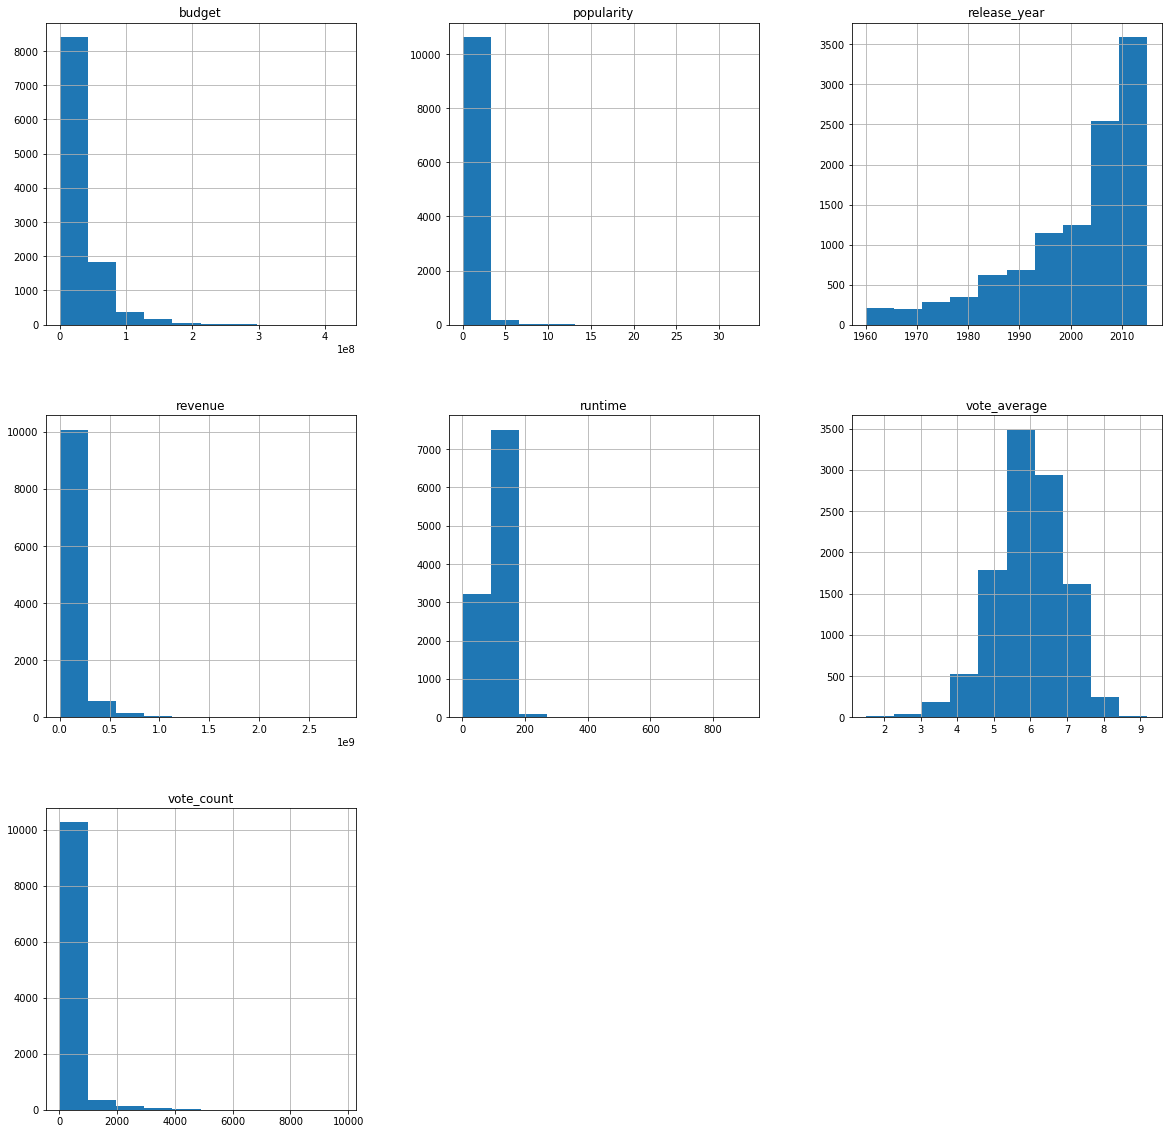

In [26]:
TMDB_df.hist(figsize = (20, 20));

<a id='eda'></a>
## <span style="color:darkgoldenrod">3- Exploratory Data Analysis </span>

### <span style="color:teal">Question 1: In which year each genre was the most/least popular? </span>

    - investigate the genres mentioned in TMDB dataframe

In [28]:
#create a list for mentioned genres
list_of_mentioned_genres =[]

# split genres in genres columns by |
for genre in TMDB_df['genres']:
    list_of_mentioned_genres.append(genre.split('|'))

# remove duplicates to get list of mentioned movies genres
list_of_mentioned_genres = np.concatenate(list_of_mentioned_genres).ravel().tolist() # flatten lists of list
genres_list = list(dict.fromkeys(list_of_mentioned_genres))         # remove duplicates 
genres_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

    - Create a df for the number of movies for every genre in each year

In [29]:
# create a new DataFrame from the two columns 'release_year' and 'genres'
years_and_genres_df = TMDB_df[['release_year','genres']].copy()
group_by_year = years_and_genres_df.groupby('release_year') # group by release date

In [30]:
# create a dict for each year and the number of movies of each genre
years_genres_dict = {}

# group by will create a df for every year so we will loop on each df
for year, year_genres_df in group_by_year:
    year_genres_count_list =[]
    for genre in genres_list:
        year_genres_count_list.append(year_genres_df.genres.str.count(genre).sum())
    years_genres_dict[year] = year_genres_count_list

In [31]:
# create df from dict   
years_genres_df = pd.DataFrame.from_dict(years_genres_dict, orient='index', columns = genres_list)

    - Check the years/genres dataframe

In [32]:
years_genres_df.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
1960,8,5,3,6,2,2,6,13,3,0,8,0,6,2,5,1,7,0,0,1
1961,7,6,4,0,2,2,3,16,5,1,10,1,7,2,3,2,3,0,0,1
1962,8,7,2,7,1,3,3,21,2,0,5,4,5,3,4,1,5,0,0,1
1963,4,7,2,10,2,4,2,13,3,1,13,6,8,1,4,0,9,0,0,2
1964,5,5,4,9,4,10,1,20,4,2,16,4,9,3,3,5,6,0,0,1


Note: we can't count the number of movies from this dataframe. since one movie can have more than one genre. so it just shows the number of movies that have this genre in its description.

In [33]:
years_genres_df.describe()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,42.571429,26.267857,21.946429,51.910714,16.357143,24.178571,2.946429,85.000000,21.982143,12.482143,67.732143,14.464286,30.571429,4.821429,5.964286,7.285714,29.232143,9.285714,2.982143,3.357143
std,35.948376,21.096739,19.371413,51.321545,14.238780,19.544920,2.186069,78.724837,20.073040,15.142944,59.957710,12.575538,26.782530,4.204358,4.895134,7.581591,30.901010,17.247624,4.300068,4.768947
min,4.000000,5.000000,2.000000,0.000000,0.000000,2.000000,0.000000,13.000000,2.000000,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,12.500000,7.750000,6.000000,15.250000,3.000000,7.750000,1.000000,21.750000,4.000000,2.000000,13.000000,5.000000,6.750000,2.000000,3.000000,2.750000,8.750000,0.750000,0.000000,0.000000
50%,32.500000,18.500000,18.000000,30.500000,14.000000,19.500000,3.000000,53.000000,14.500000,4.500000,52.500000,9.000000,21.500000,4.000000,4.000000,4.000000,18.000000,2.000000,1.000000,1.000000
75%,63.250000,40.250000,28.250000,67.750000,23.250000,35.250000,4.000000,110.750000,36.000000,21.500000,101.750000,22.500000,48.250000,6.250000,8.000000,10.250000,29.250000,6.250000,3.500000,4.000000
max,129.000000,72.000000,86.000000,179.000000,49.000000,71.000000,8.000000,284.000000,72.000000,50.000000,198.000000,51.000000,85.000000,23.000000,24.000000,33.000000,125.000000,73.000000,20.000000,18.000000


        - we can see that 'Drama', 'Comedy' & 'thriller' are the most popular genres
        - and 'Western', 'Foreign' & 'TV Movie' are the least popular genres

    - Create a df for top and least popular years for genres

In [34]:
#create a dict for top and least popular years for genres
t_l_year_genre_dict ={}

#loop on columns in years_genres_df to get the max and minimum number of movies for genres and the corresponding years
for column in years_genres_df.columns:
  #get the max number of movies in the column and the years  
    max_number_of_movies = int(years_genres_df[column].max())
    top_year_for_genre = years_genres_df[years_genres_df[column] == max_number_of_movies].index.values
 
  #get the min number of movies in the column and the years
    min_number_of_movies = int(years_genres_df[column].min())     
    least_year_for_genre = years_genres_df[years_genres_df[column] == min_number_of_movies].index.values

    
  # save the data in a list for each column 
    t_l_year_genre_list = []
    
    t_l_year_genre_list.append(max_number_of_movies)
    t_l_year_genre_list.append(top_year_for_genre)
   
    t_l_year_genre_list.append(min_number_of_movies)
    t_l_year_genre_list.append(least_year_for_genre)

  # then save it in a dict of lists 
    t_l_year_genre_dict[column] =  t_l_year_genre_list

# create top and least popular years for genres df
t_l_year_genre_df = pd.DataFrame.from_dict(t_l_year_genre_dict, orient = 'index', columns = ['max_number_of_movies' , 'max_in_year', 'min_number_of_movies',  'min_in_year'])

    - Check the df

In [35]:
t_l_year_genre_df.head()

,max_number_of_movies,max_in_year,min_number_of_movies,min_in_year
Action,129,[2014],4,[1963]
Adventure,72,[2009],5,"[1960, 1964, 1968, 1969, 1971, 1972, 1973]"
Science Fiction,86,[2015],2,"[1962, 1963, 1965]"
Thriller,179,[2014],0,[1961]
Fantasy,49,[2009],0,"[1965, 1979]"


    - Print the collected info for better visualization

In [36]:
for genre_index in t_l_year_genre_df.index:
    print(" \n- The max number of  '{} movies'  was in the year/s  {},  with a number of  '{}'  movie/s,"\
    " while the min number was in the year/s  {},  with a number of  '{}'  movie/s\n".format(genre_index, 
    t_l_year_genre_df.max_in_year[genre_index], t_l_year_genre_df.max_number_of_movies[genre_index], 
    t_l_year_genre_df.min_in_year[genre_index], t_l_year_genre_df.min_number_of_movies[genre_index]))

 
- The max number of  'Action movies'  was in the year/s  [2014],  with a number of  '129'  movie/s, while the min number was in the year/s  [1963],  with a number of  '4'  movie/s

 
- The max number of  'Adventure movies'  was in the year/s  [2009],  with a number of  '72'  movie/s, while the min number was in the year/s  [1960 1964 1968 1969 1971 1972 1973],  with a number of  '5'  movie/s

 
- The max number of  'Science Fiction movies'  was in the year/s  [2015],  with a number of  '86'  movie/s, while the min number was in the year/s  [1962 1963 1965],  with a number of  '2'  movie/s

 
- The max number of  'Thriller movies'  was in the year/s  [2014],  with a number of  '179'  movie/s, while the min number was in the year/s  [1961],  with a number of  '0'  movie/s

 
- The max number of  'Fantasy movies'  was in the year/s  [2009],  with a number of  '49'  movie/s, while the min number was in the year/s  [1965 1979],  with a number of  '0'  movie/s

 
- The max number of  'Crim

    - lets see a visualization of each genre versus the years

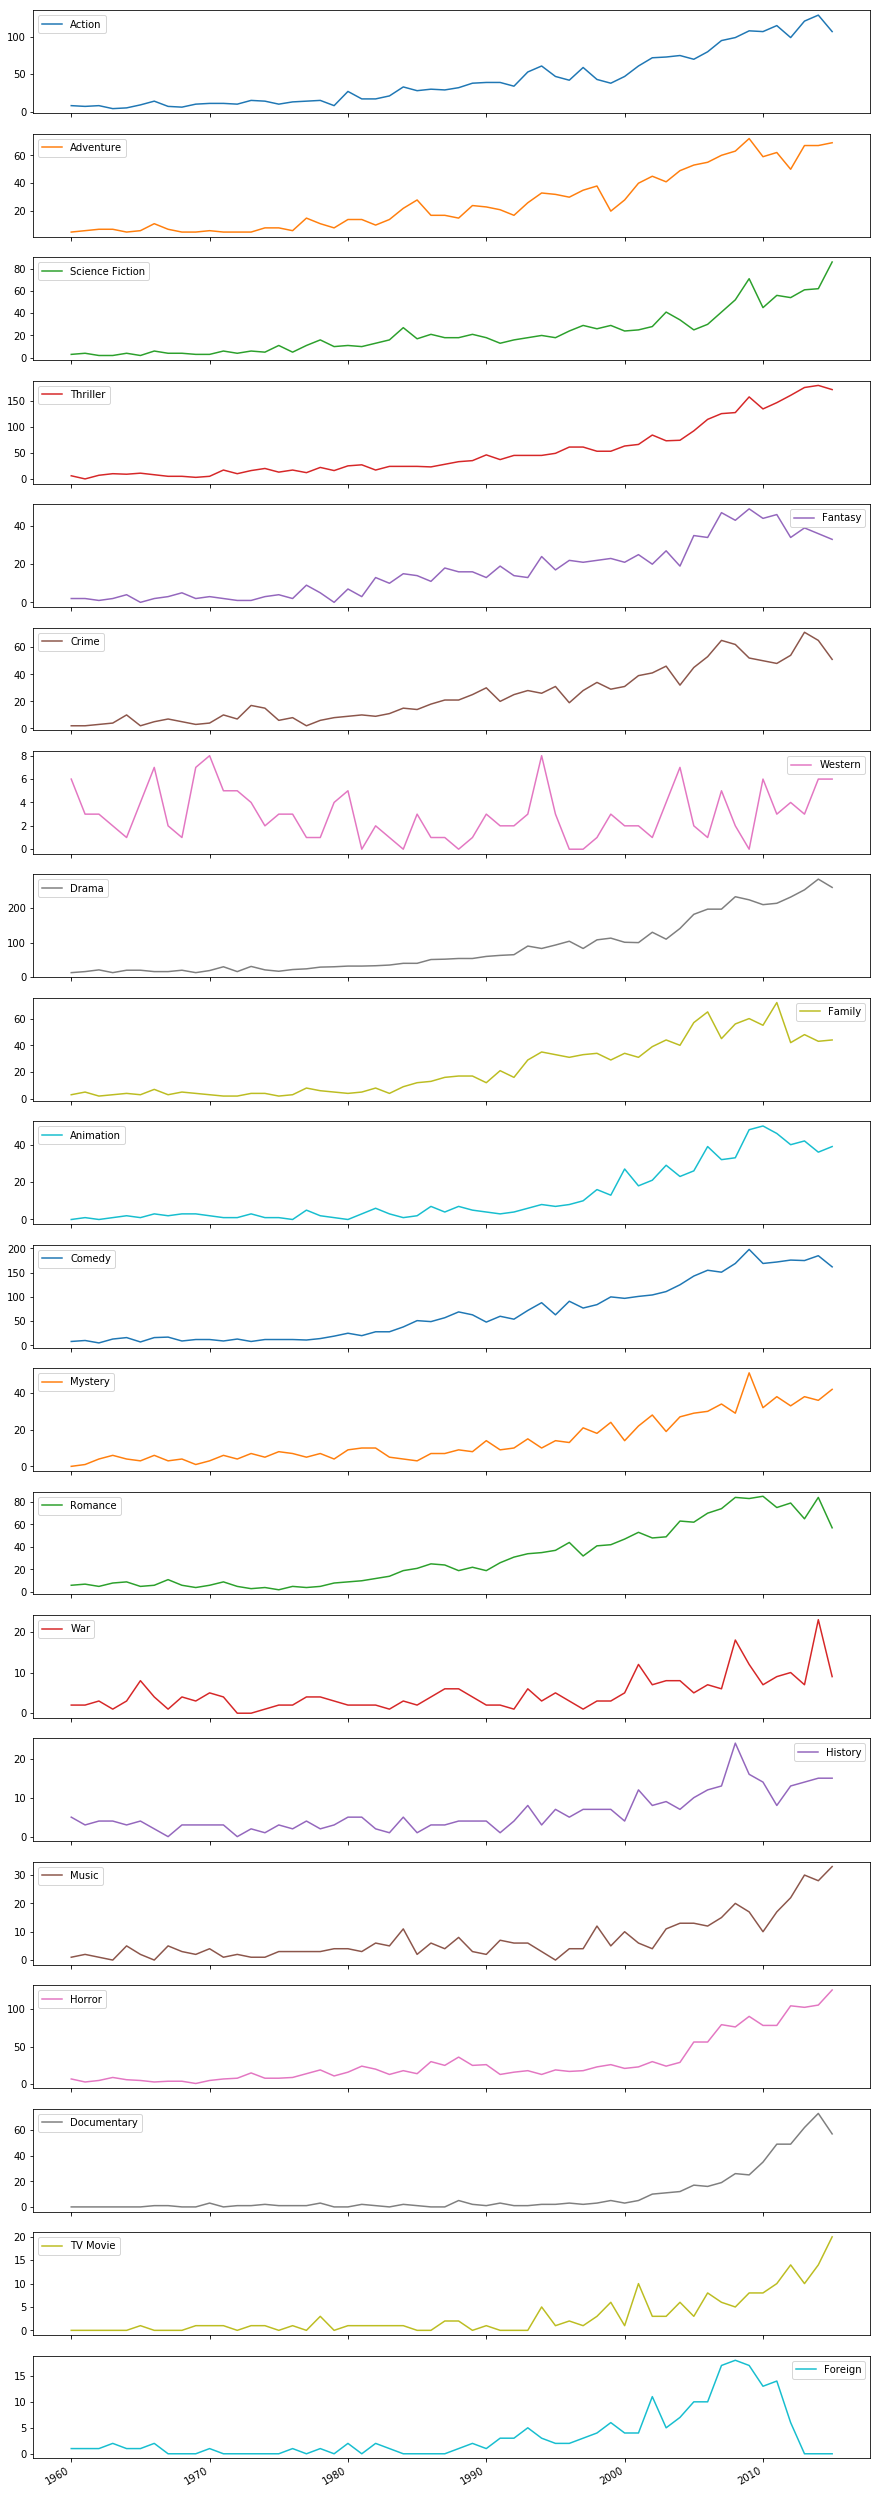

In [37]:
years_genres_df.plot(figsize = (15, 50),subplots=True , use_index=True);

        - It is obvious that the number of movies increased through years specially by year 2000
        - The maximum number of movies for certain genre appears to be at late years as the number of movies increased      
        generally
        - and so for the minimum number of movies for the genres appears to be in the early years.

### <span style="color:teal">Question 2: Which genres are most/least popular from year to year? </span>

    - lets see the most/least popular genre for every year

In [38]:
# get the column name that has the maximum/minimum number & create a list of it
m_l_popular_genres_list = list(zip(years_genres_df.idxmax(axis='columns'),years_genres_df.idxmin(axis='columns')))

In [39]:
# create a dataframe for the most/least popular genres for each year
year_m_l_popular_genre_df = pd.DataFrame(m_l_popular_genres_list, index = years_genres_df.index,  columns = ['most_popular_genre', 'least_popular_genre'])

In [40]:
year_m_l_popular_genre_df.head()

,most_popular_genre,least_popular_genre
1960,Drama,Animation
1961,Drama,Thriller
1962,Drama,Animation
1963,Drama,Music
1964,Drama,Documentary


In [41]:
for year_index in year_m_l_popular_genre_df.index:
    print("- Year  '{}',  the most popular genre was  '{}',  while the least popular genre was  '{}'".format(year_index,
    year_m_l_popular_genre_df.most_popular_genre[year_index], year_m_l_popular_genre_df.least_popular_genre[year_index]))

- Year  '1960',  the most popular genre was  'Drama',  while the least popular genre was  'Animation'
- Year  '1961',  the most popular genre was  'Drama',  while the least popular genre was  'Thriller'
- Year  '1962',  the most popular genre was  'Drama',  while the least popular genre was  'Animation'
- Year  '1963',  the most popular genre was  'Drama',  while the least popular genre was  'Music'
- Year  '1964',  the most popular genre was  'Drama',  while the least popular genre was  'Documentary'
- Year  '1965',  the most popular genre was  'Drama',  while the least popular genre was  'Fantasy'
- Year  '1966',  the most popular genre was  'Drama',  while the least popular genre was  'Music'
- Year  '1967',  the most popular genre was  'Comedy',  while the least popular genre was  'History'
- Year  '1968',  the most popular genre was  'Drama',  while the least popular genre was  'Documentary'
- Year  '1969',  the most popular genre was  'Drama',  while the least popular genre was  

    - lets summarize and see the most/least popular genres amoung years in general

In [42]:
"""
    year_to_year_genre_summary (y2ygs):
    get the unique values in columns
      
    Args:
        (str) y2ygs_col_name - column name
"""
def year_to_year_genre_summary (y2ygs_col_name):
    print("The '{} popular' genres amoung years in general are:".format(str(y2ygs_col_name).split('_')[0]))
    
    col_unique_values = year_m_l_popular_genre_df[y2ygs_col_name].unique()
    for count, genre_unique in enumerate(col_unique_values, start = 1):
        print('\t',count,'-',genre_unique)

In [43]:
year_to_year_genre_summary('most_popular_genre')

The 'most popular' genres amoung years in general are:
	 1 - Drama
	 2 - Comedy


In [44]:
year_to_year_genre_summary('least_popular_genre')

The 'least popular' genres amoung years in general are:
	 1 - Animation
	 2 - Thriller
	 3 - Music
	 4 - Documentary
	 5 - Fantasy
	 6 - History
	 7 - TV Movie
	 8 - War
	 9 - Foreign
	 10 - Western


    - The following bar chart shows the movies genres stacked versus years

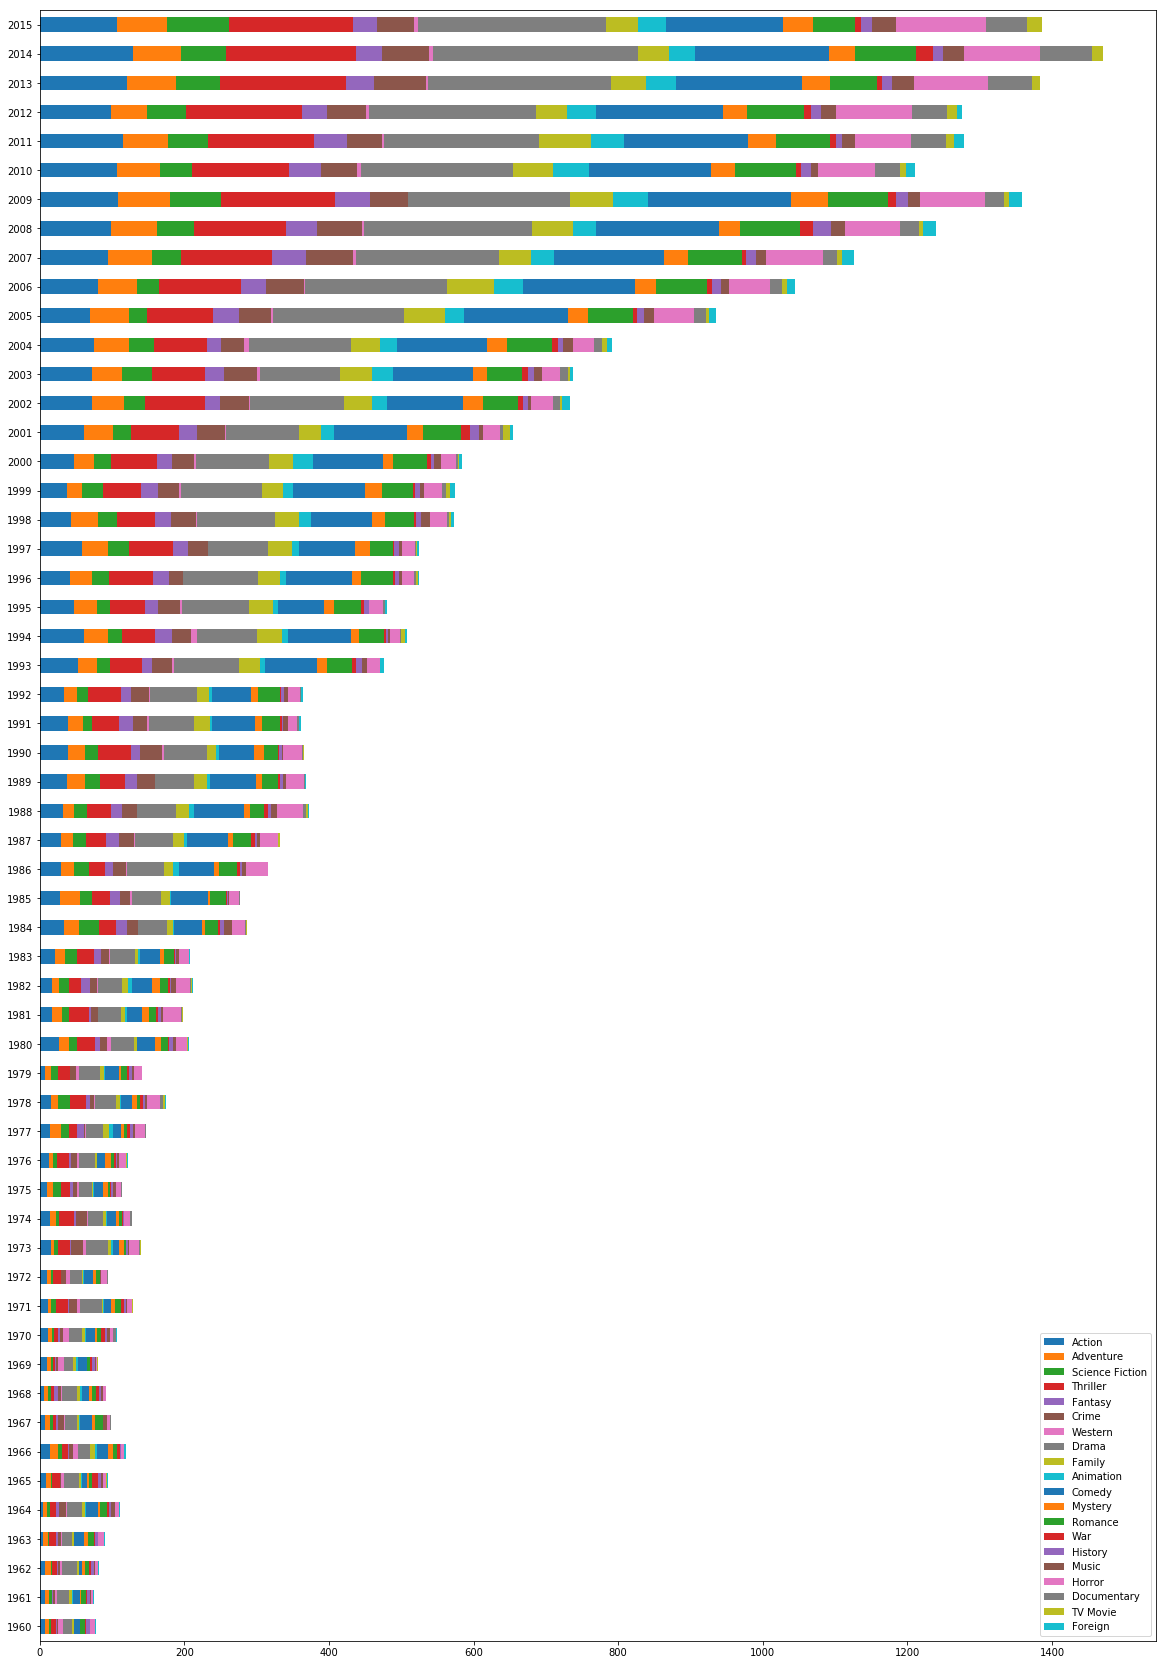

In [45]:
years_genres_df.plot.barh(figsize = (20, 30),stacked=True);

        - We can see grey (drama) & blue (comedy) colors are the most dominant

### <span style="color:teal">Question 3: Did the number of movies increase through years? and what is the average growth rate? </span>

    - Calculate the number of movies per year

In [46]:
# count the number of movies per year and create a dataframe
no_of_movies_per_year = TMDB_df['release_year'].value_counts()
no_of_movies_per_year_df = pd.DataFrame(no_of_movies_per_year)

no_of_movies_per_year_df.rename(columns={'release_year': 'number_of_movies'}, inplace= True) # rename the column
no_of_movies_per_year_df.sort_index(inplace=True)  # sort by year

In [47]:
no_of_movies_per_year_df.head()

,number_of_movies
1960,32
1961,31
1962,32
1963,34
1964,42


    - Calculate the annual growth rate

$$growth \ rate_{current year} \ \% =  [{number \ of \ movies_{current \ year} - number \ of \ movies_{previous \ year} \over number \ of \ movies_{previous \ year}}] * 100 \ \%$$ 

In [48]:
# calculate growth rate 
grow_rate_list=[0]
for movie_count_index in range(1, len(no_of_movies_per_year_df), 1):
   # growth rate = current year no. of movies /  
    current_no_of_movies = no_of_movies_per_year_df.number_of_movies.iloc[movie_count_index]
    past_no_of_movies = no_of_movies_per_year_df.number_of_movies.iloc[(movie_count_index - 1) ]
    
    growth_rate =  ((current_no_of_movies - past_no_of_movies) / past_no_of_movies) * 100

    grow_rate_list.append(round(growth_rate,2))

In [49]:
# add growth rate column to df
no_of_movies_per_year_df['growth_rate_percent'] = grow_rate_list

In [50]:
no_of_movies_per_year_df.head()

,number_of_movies,growth_rate_percent
1960,32,0.00
1961,31,-3.12
1962,32,3.23
1963,34,6.25
1964,42,23.53


    - Plot years vs number of movies

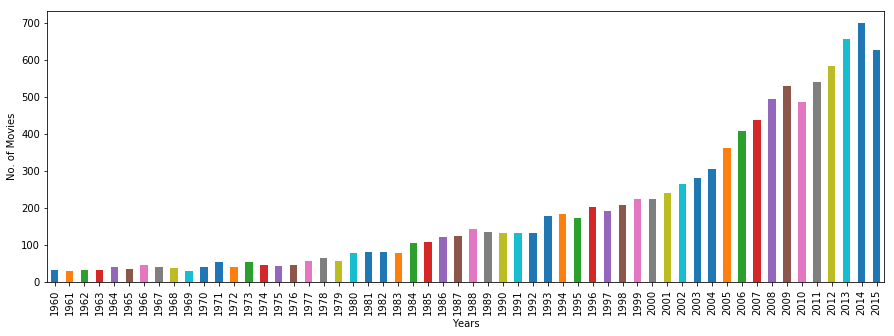

In [51]:
# plot years vs number of movies
no_of_movies_per_year_df.number_of_movies.plot(kind='bar', figsize = (15, 5));
plt.xlabel("Years");
plt.ylabel("No. of Movies");

        - Year 2014 had the maximum number of movies, while year 1961 & 1969 had the minimum number of movies.

    - Now, plot years vs growth rate

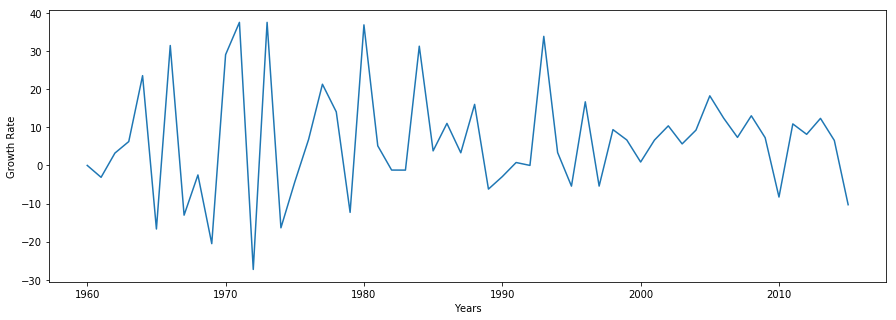

In [52]:
# plot years vs growth rate
no_of_movies_per_year_df.growth_rate_percent.plot(figsize = (15, 5));
plt.xlabel("Years");
plt.ylabel("Growth Rate");

        - the plot shows that the number of movies experience ups and downs

    - Get the growth rate average

In [53]:
average_growth_rate = no_of_movies_per_year_df.growth_rate_percent.mean()
print('\tAverage Growth Rate = {}%'.format(round(average_growth_rate, 2)))

	Average Growth Rate = 6.44%


### <span style="color:teal">Question 4: What are the top 10 movies with respect to [ Popularity,  Budget,  Revenue,  Runtime,  Vote Average]</span>


In [54]:
"""
    top_ten_list_fn (ttl):
        print the top 10 movies with respect to the passed column
      
    Args:
        (str) ttl_col_name - column name
"""
def top_ten_list_fn (ttl_col_name):
    print("Top 10 movies list based on movie's '{}':".format(str(ttl_col_name).replace('_',' ').title()))
    
  # get the top 10 list
    top__ten_list =TMDB_df.nlargest(10, ttl_col_name)

  # loop to print the movie name with its corresponding value
    for count, (top_list_item,top_list_value) in enumerate(zip(top__ten_list['original_title'].values, top__ten_list[ttl_col_name].values), start=1):
        print('\t',count,"- '{}' with {} equal to '{:.2f}'".format(top_list_item, str(ttl_col_name).replace('_',' '), top_list_value))

####   <span style="color:crimson">  Popularity Top 10 List:</span>

In [55]:
top_ten_list_fn('popularity')

Top 10 movies list based on movie's 'Popularity':
	 1 - 'Jurassic World' with popularity equal to '32.99'
	 2 - 'Mad Max: Fury Road' with popularity equal to '28.42'
	 3 - 'Interstellar' with popularity equal to '24.95'
	 4 - 'Guardians of the Galaxy' with popularity equal to '14.31'
	 5 - 'Insurgent' with popularity equal to '13.11'
	 6 - 'Captain America: The Winter Soldier' with popularity equal to '12.97'
	 7 - 'Star Wars' with popularity equal to '12.04'
	 8 - 'John Wick' with popularity equal to '11.42'
	 9 - 'Star Wars: The Force Awakens' with popularity equal to '11.17'
	 10 - 'The Hunger Games: Mockingjay - Part 1' with popularity equal to '10.74'


####   <span style="color:crimson">  Budget Top 10 List:</span>

In [56]:
top_ten_list_fn('budget')

Top 10 movies list based on movie's 'Budget':
	 1 - 'The Warrior's Way' with budget equal to '425000000.00'
	 2 - 'Pirates of the Caribbean: On Stranger Tides' with budget equal to '368371256.18'
	 3 - 'Pirates of the Caribbean: At World's End' with budget equal to '315500574.79'
	 4 - 'Superman Returns' with budget equal to '292050672.74'
	 5 - 'Titanic' with budget equal to '271692064.21'
	 6 - 'Spider-Man 3' with budget equal to '271330494.32'
	 7 - 'Tangled' with budget equal to '260000000.00'
	 8 - 'Avengers: Age of Ultron' with budget equal to '257599886.66'
	 9 - 'Harry Potter and the Half-Blood Prince' with budget equal to '254100108.53'
	 10 - 'Waterworld' with budget equal to '250419201.74'


####   <span style="color:crimson">  Revenue Top 10 List:</span>

In [57]:
top_ten_list_fn('revenue')

Top 10 movies list based on movie's 'Revenue':
	 1 - 'Avatar' with revenue equal to '2827123750.41'
	 2 - 'Star Wars' with revenue equal to '2789712242.28'
	 3 - 'Titanic' with revenue equal to '2506405735.42'
	 4 - 'The Exorcist' with revenue equal to '2167324901.20'
	 5 - 'Jaws' with revenue equal to '1907005841.92'
	 6 - 'Star Wars: The Force Awakens' with revenue equal to '1902723129.80'
	 7 - 'E.T. the Extra-Terrestrial' with revenue equal to '1791694309.25'
	 8 - 'The Net' with revenue equal to '1583049536.35'
	 9 - 'One Hundred and One Dalmatians' with revenue equal to '1574814739.70'
	 10 - 'The Avengers' with revenue equal to '1443191435.21'


####   <span style="color:crimson">  Runtime Top 10 List:</span>

In [58]:
top_ten_list_fn('runtime')

Top 10 movies list based on movie's 'Runtime':
	 1 - 'The Story of Film: An Odyssey' with runtime equal to '900.00'
	 2 - 'Taken' with runtime equal to '877.00'
	 3 - 'Band of Brothers' with runtime equal to '705.00'
	 4 - 'Shoah' with runtime equal to '566.00'
	 5 - 'North and South, Book I' with runtime equal to '561.00'
	 6 - 'Planet Earth' with runtime equal to '550.00'
	 7 - 'The Pacific' with runtime equal to '540.00'
	 8 - 'John Adams' with runtime equal to '501.00'
	 9 - 'Life' with runtime equal to '500.00'
	 10 - 'Generation Kill' with runtime equal to '470.00'


####   <span style="color:crimson">  Vote Average Top 10 List:</span>

In [59]:
top_ten_list_fn('vote_average')

Top 10 movies list based on movie's 'Vote Average':
	 1 - 'The Story of Film: An Odyssey' with vote average equal to '9.20'
	 2 - 'The Mask You Live In' with vote average equal to '8.90'
	 3 - 'Black Mirror: White Christmas' with vote average equal to '8.80'
	 4 - 'Life Cycles' with vote average equal to '8.80'
	 5 - 'Pink Floyd: Pulse' with vote average equal to '8.70'
	 6 - 'Opeth: In Live Concert At The Royal Albert Hall' with vote average equal to '8.60'
	 7 - 'John Mayer: Where the Light Is Live in Los Angeles' with vote average equal to '8.50'
	 8 - 'The Art of Flight' with vote average equal to '8.50'
	 9 - 'A Personal Journey with Martin Scorsese Through American Movies' with vote average equal to '8.50'
	 10 - 'Queen - Rock Montreal' with vote average equal to '8.50'


### <span style="color:teal">Question 5: How do popularity, budget and vote average associated with revenue?  </span>

    - Create a mask for revenue below average and above average

In [60]:
#create masks
revenue_avg = TMDB_df['revenue'].mean()
revenue_below_avg = TMDB_df.revenue < revenue_avg
revenue_above_avg = TMDB_df.revenue >= revenue_avg

In [61]:
"""
    revenue_association (ra):
        show the association with revenue
      
    Args:
        (str) ra_col_name - column name
"""
def revenue_association (ra_col_name): 
    
    print("\t- movies with revenue 'below' average has {} mean = {:.2F}".format(ra_col_name,TMDB_df[ra_col_name][revenue_below_avg].mean()))
    print("\t- movies with revenue 'above' average has {} mean = {:.2F}".format(ra_col_name,TMDB_df[ra_col_name][revenue_above_avg].mean()))
    
    plt1 = TMDB_df[ra_col_name][revenue_below_avg].hist(alpha = 0.5, figsize = (10, 5), label='Revenue Below Average');
    plt2 = TMDB_df[ra_col_name][revenue_above_avg].hist(alpha = 0.5, figsize = (10, 5), label='Revenue Above Average');
    plt1.set_xlabel(str(ra_col_name).replace('_',' ').title())
    plt.legend();

####   <span style="color:crimson">  Association between 'Popularity' and 'Revenue':</span>

	- movies with revenue 'below' average has popularity mean = 0.50
	- movies with revenue 'above' average has popularity mean = 0.96


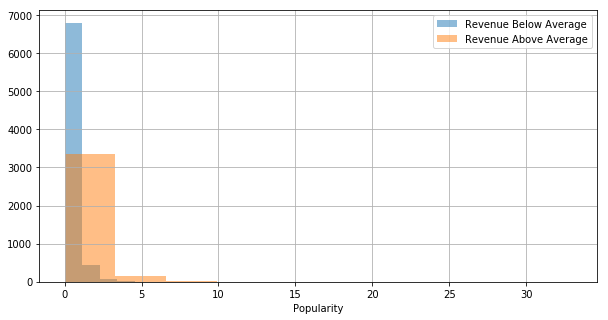

In [62]:
revenue_association('popularity')

        - The popularity mean for revenue below average is less than that of above average. 
        - This shows that movies with high revenue is associated with higher popularity 
        - and thats logical since popular movies have high watching rates and so high revenues

####   <span style="color:crimson">  Association between 'Budget' and 'Revenue':</span>

	- movies with revenue 'below' average has budget mean = 23801030.17
	- movies with revenue 'above' average has budget mean = 53217594.49


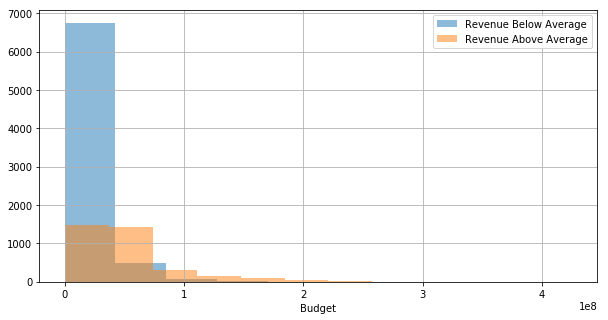

In [63]:
revenue_association('budget')

        - It was expected that low budget movies have lower revenue, 
        - but we can see that some of the low budget movies managed to achieve revenue above average
        - in general high budget movies is associated with revenue above average

####   <span style="color:crimson">  Association between 'Vote Average' and 'Revenue':</span>

	- movies with revenue 'below' average has vote_average mean = 5.91
	- movies with revenue 'above' average has vote_average mean = 6.11


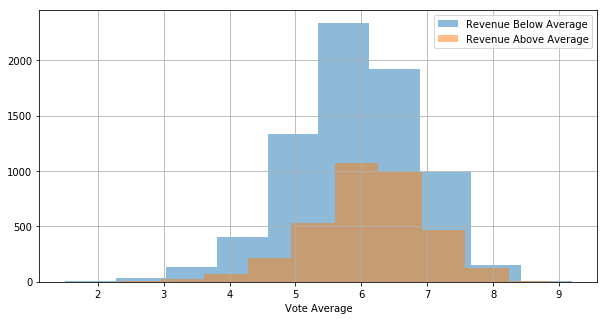

In [64]:
revenue_association('vote_average')

        - The two graphs and their means are almost the same we can't deduce any association between vote average and           revenue

####   <span style="color:crimson">  Association between 'Vote Count' and 'Revenue':</span>

	- movies with revenue 'below' average has vote_count mean = 113.22
	- movies with revenue 'above' average has vote_count mean = 435.60


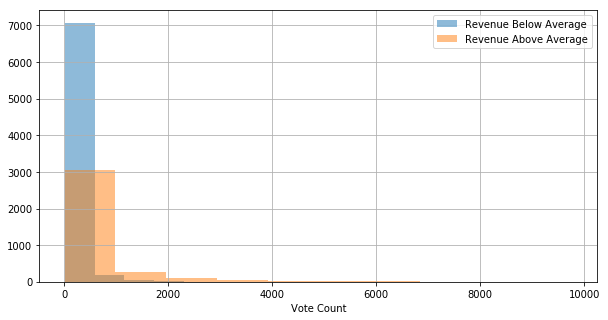

In [65]:
revenue_association('vote_count')

        - we can see that vote count resembles popularity
        - both are related to watching rates
        - the more the number of vote counts the more popular the movie is
        - so high number of vote counts is associated with high revenue

### <span style="color:teal">Question 6: What is the relation between vote average and popularity?  </span>

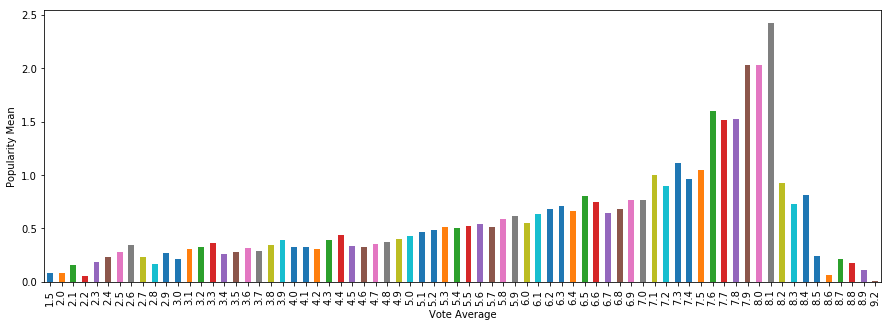

In [66]:
TMDB_df.groupby('vote_average').popularity.mean().plot(kind='bar', figsize = (15, 5), use_index=True);
plt.xlabel("Vote Average");
plt.ylabel("Popularity Mean");

        - We can see that vote average and popularity are correlated except for high values of vote average 
        - High values of vote average always seem to be biased and not true

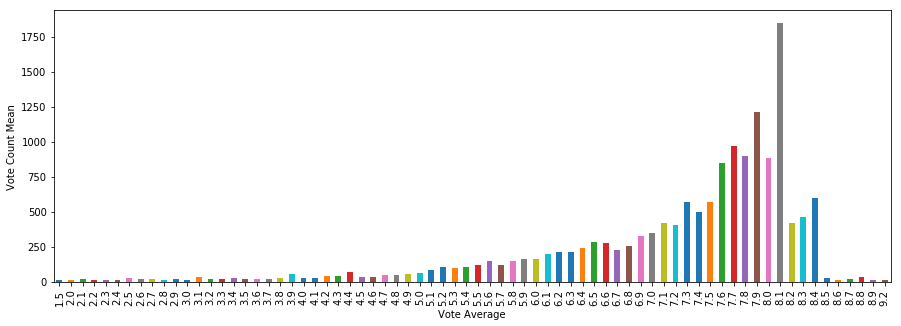

In [67]:
TMDB_df.groupby('vote_average').vote_count.mean().plot(kind='bar', figsize = (15, 5), use_index=True);
plt.xlabel("Vote Average");
plt.ylabel("Vote Count Mean");

        - here, we can verify that very high vote average isn't true or biased
        - they have lower vote count mean which means that they may be individual opinions or errored

<a id='conclusions'></a>
## Conclusions

- 'Drama', 'Comedy' & 'thriller' are the most popular genres and 'Western', 'Foreign' & 'TV Movie' are the least popular genres. 
- The number of movies experienced ups and downs. but generally, it increased through years specially by year 2000.
- Movies with high popularity is associated with high revenue 
- in general, high budget movies is associated with revenue above average, but we can see that some of the low budget movies managed to achieve revenue above average too.
- Vote average and popularity are correlated except for high values of vote average.
- High values of vote average appear to be biased and not true, they have lower vote count which means that they may be individual opinions or errored


> **Limitations**: 
- we couldn't use 'cast','director','production_companies' in our analysis due to large amount of missing data.
- the zero values in budget and reven

In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0